In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

In [15]:
df = pd.read_csv(r"C:\Users\mdgha\Downloads\train\train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = df.drop(columns='label')
y = df['label']

In [30]:
X.shape

(42000, 784)

In [25]:
y[-5:]

41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, dtype: int64

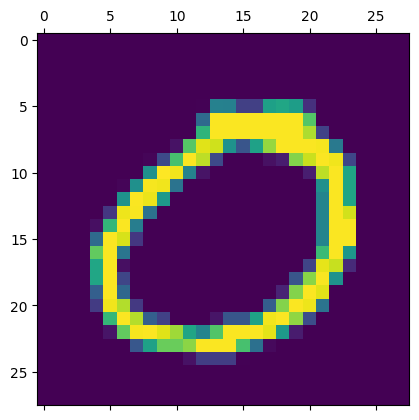

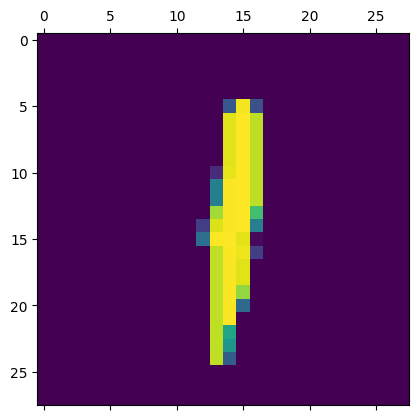

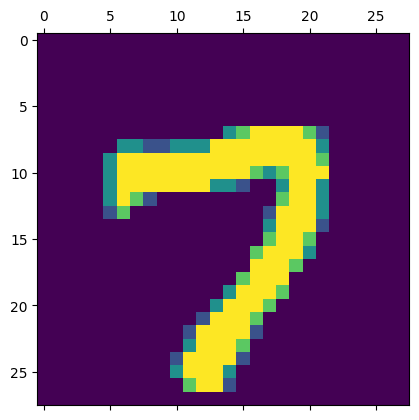

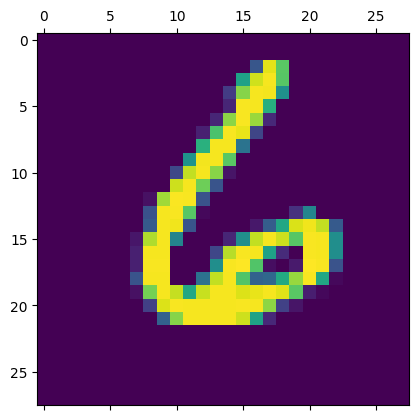

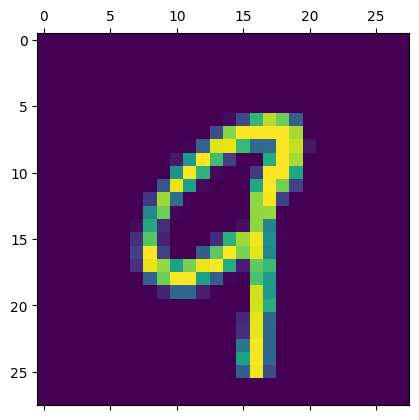

In [27]:
for i in range(len(X)-5, len(X)):

    plt.matshow(np.array(X.iloc[i]).reshape(28, 28))

In [54]:
W1 = np.random.randn(100, 784) #Initializing weights for edges from IP layer to the Hidden layer
b1 = np.random.randn(100, 1) #Bias from IP to Hidden layer
W2 = np.random.randn(10, 100) #Weights for edges from Hidden layer to the OP layer
b2 = np.random.randn(10, 1) #Associated Bias from Hidden layer to OP layer

In [36]:
X.shape

(42000, 784)

In [130]:
def generate_Y(y):
    Y = np.zeros((len(y), 10))
    for i in range(len(y)):
        Y[i, y[i]] = 1
    return Y

def sigmoid(z):
    # Clip the input to avoid overflow issues
    z_clipped = np.clip(z, -100, 100)
    return 1 / (1 + np.exp(-z_clipped))



def estimate_loss(Y, A2):
    m = len(Y)
    return (1/m)*np.sum((Y.T-A2)**2)

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backpropagation(X, Y, Z1, A1, Z2, A2): 
    m = len(Y)
    dj_w2 = 2*A2*(1-A2)*(Y.T-A2)*(1/m)
    dZ2 = np.dot(dj_w2, A1.T)*(1/m)
    dj_w1 = np.dot(dZ2.T, A2*(1-A2))*(1/m)
    dZ1 = np.dot(dj_w1, X)*(1/m)
    return dj_w2, dZ2, dj_w1, dZ1

def update_weights(W1, b1, W2, b2, dj_w2, dZ2, dj_w1, dZ1, l_r=0.01):
    W1 += l_r*dZ1
    W2 += l_r*dZ2
    b1 += l_r*np.sum(dj_w1)
    b2 += l_r*np.sum(dj_w2)
    return W1, b1, W2, b2

def fit_NN(X, y, epoch=100):
    W1 = np.random.randn(100, 784) #Initializing weights for edges from IP layer to the Hidden layer
    b1 = np.random.randn(100, 1) #Bias from IP to Hidden layer
    W2 = np.random.randn(10, 100) #Weights for edges from Hidden layer to the OP layer
    b2 = np.random.randn(10, 1) #Associated Bias from Hidden layer to OP layer
    Y = generate_Y(y)
    for i in range(epoch+1):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dj_w2, dZ2, dj_w1, dZ1 = backpropagation(X, Y, Z1, A1, Z2, A2)
        W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, dj_w2, dZ2, dj_w1, dZ1)
        if i%10==0:
            loss_val = estimate_loss(Y, A2)
            print(f"Loss at iteration {i}:  {loss_val}")



In [91]:
X.shape

(42000, 784)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [94]:
X_scaled = scaler.fit_transform(X)

In [95]:
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
fit_NN(X_scaled, y)

Loss at iteration 0:  5.039860134234541
Loss at iteration 10:  5.0140279067614415
Loss at iteration 20:  4.988148605293299
Loss at iteration 30:  4.962226076988374
Loss at iteration 40:  4.936264212602145
Loss at iteration 50:  4.910266943085904
Loss at iteration 60:  4.884238236107182
Loss at iteration 70:  4.8581820925145625
Loss at iteration 80:  4.832102542769123
Loss at iteration 90:  4.806003643363926
Loss at iteration 100:  4.779889473251389
